In [1]:
import torch
import torchvision.models
import hiddenlayer as hl

/home/grayfield/ENTER/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/grayfield/ENTER/envs/torch/lib/python3.9/site-packages/torch/onnx/symbolic_helper.py:1457: UserWarning: ONNX export mode is set to TrainingMode.EVAL, but operator 'dropout' is set to train=True. Exporting with train=True.
  warnings.warn(
/home/grayfield/ENTER/envs/torch/lib/python3.9/site-packages/hiddenlayer/pytorch_builder.py:82: FutureWarning: 'torch.onnx._patch_torch._node_getitem' is deprecated in version 1.13 and will be removed in version 1.14. Please Internally use '_node_get' in symbolic_helper instead..
  params = {k: torch_node[k] for k in torch_node.attributeNames()}


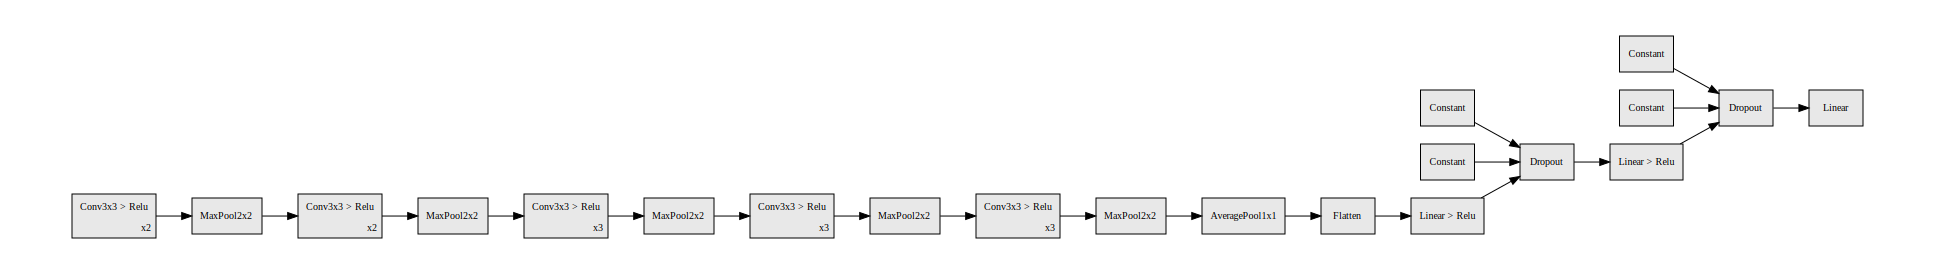

In [2]:
model = torchvision.models.vgg16()

# Build HiddenLayer graph
# Jupyter Notebook renders it automatically
hl.build_graph(model, torch.zeros([1, 3, 224, 224]))

/home/grayfield/ENTER/envs/torch/lib/python3.9/site-packages/torch/onnx/symbolic_helper.py:1457: UserWarning: ONNX export mode is set to TrainingMode.EVAL, but operator 'dropout' is set to train=True. Exporting with train=True.
  warnings.warn(
/home/grayfield/ENTER/envs/torch/lib/python3.9/site-packages/hiddenlayer/pytorch_builder.py:82: FutureWarning: 'torch.onnx._patch_torch._node_getitem' is deprecated in version 1.13 and will be removed in version 1.14. Please Internally use '_node_get' in symbolic_helper instead..
  params = {k: torch_node[k] for k in torch_node.attributeNames()}


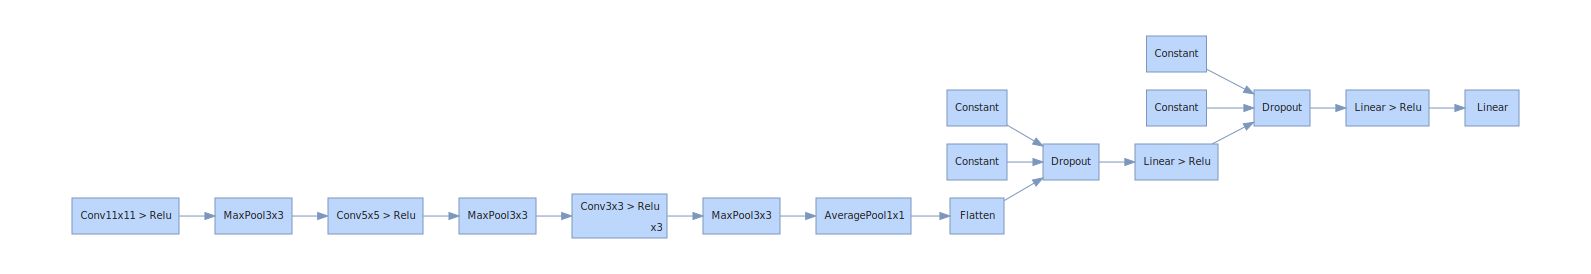

In [3]:
model = torchvision.models.alexnet()

# Build HiddenLayer graph
hl_graph = hl.build_graph(model, torch.zeros([1, 3, 224, 224]))

# Use a different color theme
hl_graph.theme = hl.graph.THEMES["blue"].copy()  # Two options: basic and blue
hl_graph

In [4]:
import torch
import torch.nn as nn
from torchsummary import summary

In [5]:
state_dim = 390
action_dim = 1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
input_shape = (30, 13)

In [8]:
hidden_num = 64

        # actor
actor = nn.Sequential(
                        nn.Flatten(start_dim=-2, end_dim=-1),
                        nn.Linear(state_dim, hidden_num),
                        nn.Tanh(),
                        nn.Dropout(0.2),
                        nn.Linear(hidden_num, hidden_num),
                        nn.Tanh(),
                        nn.Dropout(0.2),
                        nn.Linear(hidden_num, action_dim),
                        nn.Tanh()
                    ).to(device)

        # critic


summary(actor, input_shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 390]               0
            Linear-2                   [-1, 64]          25,024
              Tanh-3                   [-1, 64]               0
           Dropout-4                   [-1, 64]               0
            Linear-5                   [-1, 64]           4,160
              Tanh-6                   [-1, 64]               0
           Dropout-7                   [-1, 64]               0
            Linear-8                    [-1, 1]              65
              Tanh-9                    [-1, 1]               0
Total params: 29,249
Trainable params: 29,249
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.11
Estimated Total Size (MB): 0.12
---------------------------------------------

In [9]:
critic = nn.Sequential(
                        nn.Flatten(start_dim=-2, end_dim=-1),
                        nn.Linear(state_dim, hidden_num),
                        nn.Tanh(),
                        nn.Dropout(0.2),
                        nn.Linear(hidden_num, hidden_num),
                        nn.Tanh(),
                        nn.Dropout(0.2),
                        nn.Linear(hidden_num, 1)
                    ).to(device)

summary(critic, (30, 13))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 390]               0
            Linear-2                   [-1, 64]          25,024
              Tanh-3                   [-1, 64]               0
           Dropout-4                   [-1, 64]               0
            Linear-5                   [-1, 64]           4,160
              Tanh-6                   [-1, 64]               0
           Dropout-7                   [-1, 64]               0
            Linear-8                    [-1, 1]              65
Total params: 29,249
Trainable params: 29,249
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.11
Estimated Total Size (MB): 0.12
----------------------------------------------------------------
